### EXERCISE 1

Create a small pandas dataframe from a dictionary of country names, their capital cities and populations of 5-6 countries
1. Extend the database with a couple of countries and one column with the latest GDP values
2. Calculate a new column with GDP per capita values
3. Filter top 2 countries with highest GDP per capita
4. Visualise GDP per capita in countries using an appropriate plot (from pandas library)
5. Add a new column with Independance dates (or other national holiday) of countries in 2022 and ensure that it has an appropriate data type
6. Set the row index to country names
7. Using the resulting data frame, illustrate the difference between _.loc_ and _.iloc_ selectors

In [1]:
import pandas as pd

country = {
    "Latvia" : {
        "capital" : "Riga",
        "pop." : 1830211
    },
    "Finland" : {
        "capital" : "Helsinki",
        "pop." : 5545475
    },
    "Estonia" : {
        "capital" : "Tallinn",
        "pop." :  1322765
    },
    "Lithuania" : {
        "capital" : "Vilnius",
        "pop." : 2718352
    },
    "United States" : {
        "capital" : "Washington D.C.",
        "pop." : 339996563
    },
    "Mexico" : {
        "capital" : "Mexico City",
        "pop." : 128455567
    }
}

country_df = pd.DataFrame.from_dict(country).T
country_df.index.name = "Country Name"
country_df


,capital,pop.
Country Name,,
Latvia,Riga,1830211
Finland,Helsinki,5545475
Estonia,Tallinn,1322765
Lithuania,Vilnius,2718352
United States,Washington D.C.,339996563
Mexico,Mexico City,128455567


In [2]:
# 1
country_df.loc["Canada"] = ["Ottawa", 38781291]
country_df.loc["Japan"] = ["Tokyo", 123294513]
country_df

,capital,pop.
Country Name,,
Latvia,Riga,1830211
Finland,Helsinki,5545475
Estonia,Tallinn,1322765
Lithuania,Vilnius,2718352
United States,Washington D.C.,339996563
Mexico,Mexico City,128455567
Canada,Ottawa,38781291
Japan,Tokyo,123294513


In [3]:
country_df["GDP(USD)"] = [41153912663, 280826000000, 38100812959, 70334299008, 25462700000000, 1414190000000, 2139840000000, 4231140000000 ]
country_df

,capital,pop.,GDP(USD)
Country Name,,,
Latvia,Riga,1830211,41153912663
Finland,Helsinki,5545475,280826000000
Estonia,Tallinn,1322765,38100812959
Lithuania,Vilnius,2718352,70334299008
United States,Washington D.C.,339996563,25462700000000
Mexico,Mexico City,128455567,1414190000000
Canada,Ottawa,38781291,2139840000000
Japan,Tokyo,123294513,4231140000000


In [4]:
#2
country_df["GDP per capita"] = country_df["GDP(USD)"] // country_df["pop."]
country_df

,capital,pop.,GDP(USD),GDP per capita
Country Name,,,,
Latvia,Riga,1830211,41153912663,22485
Finland,Helsinki,5545475,280826000000,50640
Estonia,Tallinn,1322765,38100812959,28803
Lithuania,Vilnius,2718352,70334299008,25873
United States,Washington D.C.,339996563,25462700000000,74891
Mexico,Mexico City,128455567,1414190000000,11009
Canada,Ottawa,38781291,2139840000000,55177
Japan,Tokyo,123294513,4231140000000,34317


In [5]:
#3
country_df.reset_index(inplace=True)
country_df.set_index(["GDP per capita", "Country Name"]).sort_index(ascending=False).head(2)

,,capital,pop.,GDP(USD)
GDP per capita,Country Name,,,
74891,United States,Washington D.C.,339996563,25462700000000
55177,Canada,Ottawa,38781291,2139840000000


<AxesSubplot:xlabel='Country Name'>

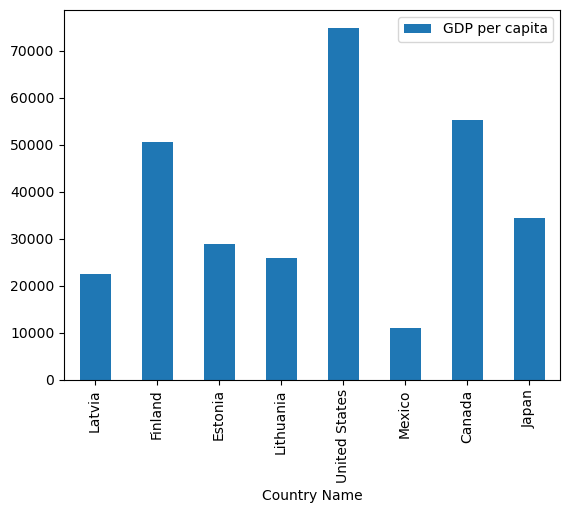

In [6]:
#4
country_df.plot.bar(x="Country Name", y="GDP per capita")

In [7]:
#5
country_df["Independance Day"] = [
    '1990/05/04',
    '1917/12/06',
    '1991/08/20',
    '1990/03/11',
    '1776/07/04',
    '1810/09/16',
    '1867/07/01',
    '1760/02/11'
]
country_df["Independance Day"] = pd.to_datetime(country_df["Independance Day"])
print(country_df.dtypes)
country_df


Country Name                object
capital                     object
pop.                        object
GDP(USD)                     int64
GDP per capita              object
Independance Day    datetime64[ns]
dtype: object


,Country Name,capital,pop.,GDP(USD),GDP per capita,Independance Day
0,Latvia,Riga,1830211,41153912663,22485,1990-05-04
1,Finland,Helsinki,5545475,280826000000,50640,1917-12-06
2,Estonia,Tallinn,1322765,38100812959,28803,1991-08-20
3,Lithuania,Vilnius,2718352,70334299008,25873,1990-03-11
4,United States,Washington D.C.,339996563,25462700000000,74891,1776-07-04
5,Mexico,Mexico City,128455567,1414190000000,11009,1810-09-16
6,Canada,Ottawa,38781291,2139840000000,55177,1867-07-01
7,Japan,Tokyo,123294513,4231140000000,34317,1760-02-11


In [8]:
#6
country_df.set_index("Country Name",inplace=True)

In [9]:
#7
print(country_df.iloc[0:2]) # able to index from the country name positions
country_df.loc["Latvia"] # finding index from values of position

               capital     pop.      GDP(USD) GDP per capita Independance Day
Country Name                                                                 
Latvia            Riga  1830211   41153912663          22485       1990-05-04
Finland       Helsinki  5545475  280826000000          50640       1917-12-06


capital                            Riga
pop.                            1830211
GDP(USD)                    41153912663
GDP per capita                    22485
Independance Day    1990-05-04 00:00:00
Name: Latvia, dtype: object

### EXERCISE 2

Using the the Bike Sharing Demand data set from the presentation
1. Select summer season's rentals using row index and loc

2. Create two new columns with temperature and humidity values, rounded to tens (10,20,30,40, etc.). Sort the data set by these two columns: rounded temperature first, rounded humidity second

3. Transform the _datetime_ into datetime data type, set it as index and sort the data frame

4. Using groupby functions, calculate: 

    a) average number of bike rentals by rounded temperature and humidity values 
    
    b) average number of bike rentals by hours of a day 
    
    c) min, max and standard deviation of temperatures by seasons
    
5. Transform the given data frame into the _long_ (longest) data format, where every row contains exactly one value

In [10]:
url = "https://raw.githubusercontent.com/DmitryPavlyuk/python-da/main/week5/data/bikes.csv"

bikes = pd.read_csv(url)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
#1
bikes.set_index("season", inplace=True)
bikes.loc["summer"]

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,,
summer,01/04/2011 00:00,0,1,3,10.66,12.880,100,11.0014,0,6,6
summer,01/04/2011 01:00,0,1,3,10.66,12.880,100,11.0014,0,4,4
summer,01/04/2011 02:00,0,1,3,10.66,12.880,93,12.9980,0,7,7
summer,01/04/2011 03:00,0,1,2,9.84,11.365,93,16.9979,0,4,4
summer,01/04/2011 04:00,0,1,2,9.84,11.365,93,16.9979,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...
summer,19/06/2012 19:00,0,1,1,32.80,38.635,59,15.0013,82,432,514
summer,19/06/2012 20:00,0,1,1,32.80,37.880,55,16.9979,59,399,458
summer,19/06/2012 21:00,0,1,1,31.16,35.605,62,11.0014,37,239,276


In [12]:
#2
bikes["rounded temp"] = bikes[["temp"]].applymap(lambda x: round(x/10)*10)
bikes["rounded humidity"] = bikes[["humidity"]].applymap(lambda x: round(x/10)*10)
bikes.reset_index().set_index(["rounded temp","rounded humidity"]).sort_index().head(5)

season          datetime  holiday  workingday  \
rounded temp rounded humidity                                                  
0            30                spring  08/02/2011 22:00        0           1   
             30                spring  08/02/2011 23:00        0           1   
             30                spring  03/01/2012 19:00        0           1   
             30                spring  03/01/2012 20:00        0           1   
             30                spring  04/01/2012 02:00        0           1   

                               weather  temp  atemp  humidity  windspeed  \
rounded temp rounded humidity                                              
0            30                      1  4.92  5.305        33    23.9994   
             30                      1  4.92  5.305        33    22.0028   
             30                      1  4.92  4.545        28    27.9993   
             30                      1  4.92  6.060        33    16.9979   
             30                      1  0.82  0.760        34    19.0012   

                               casual  registered  count  
rounded temp rounded humidity                             
0            30                     0          29     29  
             30                     3           9     12  
             30                     4         152    156  
             30                     0         115    115  
             30                     0           1      1

In [13]:
#3
bikes["datetime"] = pd.to_datetime(bikes["datetime"], format='%d/%m/%Y %H:%M')
bikes.reset_index().set_index("datetime").sort_index().head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,rounded temp,rounded humidity
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,10,80
2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,10,80
2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,10,80
2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,10,80
2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,10,80


In [14]:
#4a
bikes.groupby(["rounded temp","rounded humidity"]).mean()["count"]

rounded temp  rounded humidity
0             30                   52.333333
              40                   63.718750
              50                   50.208955
              60                   35.571429
              70                   70.166667
              80                   15.000000
              90                    9.000000
10            0                    16.444444
              20                  167.000000
              30                  154.220126
              40                  128.892632
              50                  137.262321
              60                  113.231778
              70                  100.548476
              80                   91.007299
              90                   76.078475
              100                  63.145455
20            0                    36.538462
              10                   44.666667
              20                  275.638298
              30                  290.129808
              40        

In [15]:
#4b
bikes["hour"] = bikes["datetime"].dt.hour
bikes.groupby("hour").mean()["count"]

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

In [16]:
#4c
import numpy as np
bikes.groupby("season").agg([min,max,np.mean])["temp"]

,min,max,mean
season,,,
fall,15.58,41.00,28.789111
spring,0.82,29.52,12.530491
summer,9.84,38.54,22.823483
winter,5.74,30.34,16.649239


In [17]:
#5
bikes.stack().head

<bound method NDFrame.head of season                  
spring  datetime            2011-01-01 00:00:00
        holiday                               0
        workingday                            0
        weather                               1
        temp                               9.84
                                   ...         
winter  registered                           84
        count                                88
        rounded temp                         10
        rounded humidity                     70
        hour                                 23
Length: 152404, dtype: object>

### EXERCISE 3

Develop  a function that split rows of the given data frame into two sub frames in a given proportion. E.g., _df_split(df, propostion=0.8)_ returns a tuple of two data frames, where the first contains about 80% of df rows, and the seconds - other rows.

Use the developed function to split a data frame from any other exercise and concatenate them back using "_train_" as an index of the first one and "_test_" as an index for the second one.

In [18]:
def df_split(df:pd.DataFrame, propostion=0.8)->tuple:
    temp_df = df.copy
    rows_count = len(df.index)
    slice = round(rows_count * propostion)
    train_df = df[:slice]
    test_df = df[slice:]
    return (train_df, test_df)

In [19]:
bikes_train_df, bikes_test_df = df_split(bikes)

bikes_train_and_test_df = pd.concat([bikes_train_df,bikes_test_df])

print("Train:",bikes_train_df.shape, "Test:", bikes_test_df.shape, "Train and Test:",bikes_train_and_test_df.shape)

Train: (8709, 14) Test: (2177, 14) Train and Test: (10886, 14)


### EXERCISE 4

Using the _.read_html_ function, collect infomation from any category of a public advertisement website (e.g., ss.lv):
1. Collect advertisements from 2-3 pages into data frames and concatenate them into one data frame
2. Develop a function for cleaning up the collected price - extracting numeric values. Apply the function for transforming the column _price_ of the data frame into numeric.
3. Calculate descriptive statistics of the prices - mean, median, standard deviation, min, max, etc.
4. Plot the box plot of prices

In [20]:
# 1
agenskalns = pd.read_html("https://www.ss.lv/lv/real-estate/flats/riga/agenskalns/", header=0)
centre = pd.read_html("https://www.ss.lv/lv/real-estate/flats/riga/centre/", header=0)
agenskalns_sorted = sorted(agenskalns,key=lambda x:len(x), reverse=True)[0]
centre_sorted = sorted(centre,key=lambda x:len(x), reverse=True)[0]
apartments = pd.concat([agenskalns_sorted, centre_sorted])
apartments.head()

,Sludinājumi \tdatums,Sludinājumi \tdatums.1,Sludinājumi \tdatums.2,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,NaN,NaN,Pārdod 2 istabu dzīvokli Āgenskalnā. Pretī Lat...,Vīlipa 10,2,50,7/9,467.,"1,036 €","51,800 €"
1,NaN,NaN,Pārdod vienistabas dzīvokli ar visām ērtībām. ...,Kristapa 16,1,29,4/5,Hrušč.,"1,466 €","42,500 €"
2,NaN,NaN,"Īpašnieks pārdod siltu, gaišu, pilnībā renovēt...",Mērsraga 9A,3,54,2/4,P. kara,"2,222 €","119,999 €"
3,NaN,NaN,Īpašnieks pārdod 2-istabu dzīvokli ar kosmētis...,Gregora 4,2,39,5/5,LT proj.,"1,487 €","58,000 €"
4,NaN,NaN,Piemērots lielai ģimenei. Izīrējam ilgtermiņā ...,Baložu 19,6,223,2/2,P. kara,9.42 €,"2,100 €/mēn."


In [45]:
# 2
def cleaning_price(data:pd.DataFrame):
    temp = data.copy()
    temp = temp[temp["Cena"].str.contains("mēn|pērku|vēlosīret|dienā") == False]
    temp["Cena"] = pd.to_numeric(temp["Cena"].replace('[^0-9\.-]','',regex=True))
    return temp

cleaned_apts = cleaning_price(apartments)
print("Before: ",apartments["Cena"].dtype, "After:",cleaned_apts["Cena"].dtype)

Before:  object After: int64


### EXERCISE 5

Using the _students_df_, _groups_df_, _courses_df_, and _results_df_ data frames from the presentations, construct the following data frames:
1. Course names with number of students, attended the course (0 if no students)
2. Group names with total number of students and average attendance values
3. Student names with average attendance and grades
4. Course names with number of students who attended (attendance>0), but don't have the final grade (NaN)
5. A main data frame that includes all information from the original data frames and illustrate extraction of the original data frames from the main one